# Background

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

## Exploratory Data Analysis (EDA)

Let's explore the dataset to find the fun fact about this dataset. Enjoy

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

## Import dataset

In [22]:
hourly_df = pd.read_csv(r'./data/hour.csv')
daily_df = pd.read_csv(r'./data/day.csv')

In [23]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


For the hour dataframe there's no missing values.

In [24]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


And also for the daily dataset we can say there's no missing values. But for the 'dteday' column, we can see that dtype is still object not datetime. We need to convert it to datetime.

### EDA

In [25]:
hourly_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
# Change dteday to datetime
hourly_df['dteday'] = pd.to_datetime(hourly_df['dteday'])

In [28]:
daily_df['dteday'] = pd.to_datetime(daily_df['dteday'])

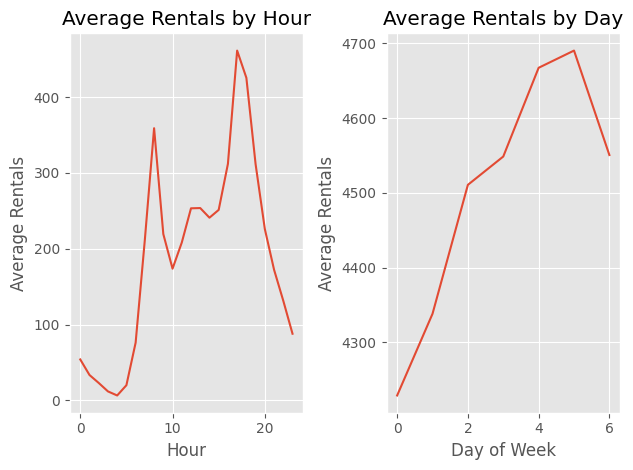

In [29]:
# Basic temporal analysis

# Hourly pattern
plt.subplot(1, 2, 1)
hourly_avg = hourly_df.groupby('hr')['cnt'].mean()
plt.plot(hourly_avg)
plt.title('Average Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rentals')

# Daily pattern
plt.subplot(1, 2, 2)
daily_avg = daily_df.groupby('weekday')['cnt'].mean()
plt.plot(daily_avg)
plt.title('Average Rentals by Day')
plt.xlabel('Day of Week')
plt.ylabel('Average Rentals')

plt.tight_layout()
plt.show()

## Temporal Analysis of Bike Rentals

### Hourly Pattern Analysis
From the left graph showing average rentals by hour, we can observe:
1. There are two distinct peak periods:
   - Morning peak (around 8-9 AM): Likely corresponding to morning commute
   - Evening peak (around 5-6 PM): Corresponding to evening commute hours
2. Lowest usage occurs during early morning hours (2-4 AM)
3. The pattern suggests strong correlation with typical working hours
4. There's a gradual increase in rentals from morning to evening, with sustained activity during daytime

### Daily Pattern Analysis
From the right graph showing average rentals by day of week (0=Sunday to 6=Saturday):
1. Weekday vs Weekend patterns:
   - Relatively stable usage during weekdays (1-5)
   - Slight decrease in usage during weekends (0 and 6)
2. Mid-week (Tuesday-Thursday) shows slightly higher usage
3. The pattern suggests:
   - Strong commuter usage during weekdays
   - More recreational usage during weekends
   - Consistent baseline demand throughout the week

### Business Implications
1. Peak hour capacity planning is crucial for 8-9 AM and 5-6 PM
2. Maintenance and rebalancing operations should be scheduled during low-usage hours (2-4 AM)
3. Different strategies might be needed for weekday commuters versus weekend recreational users

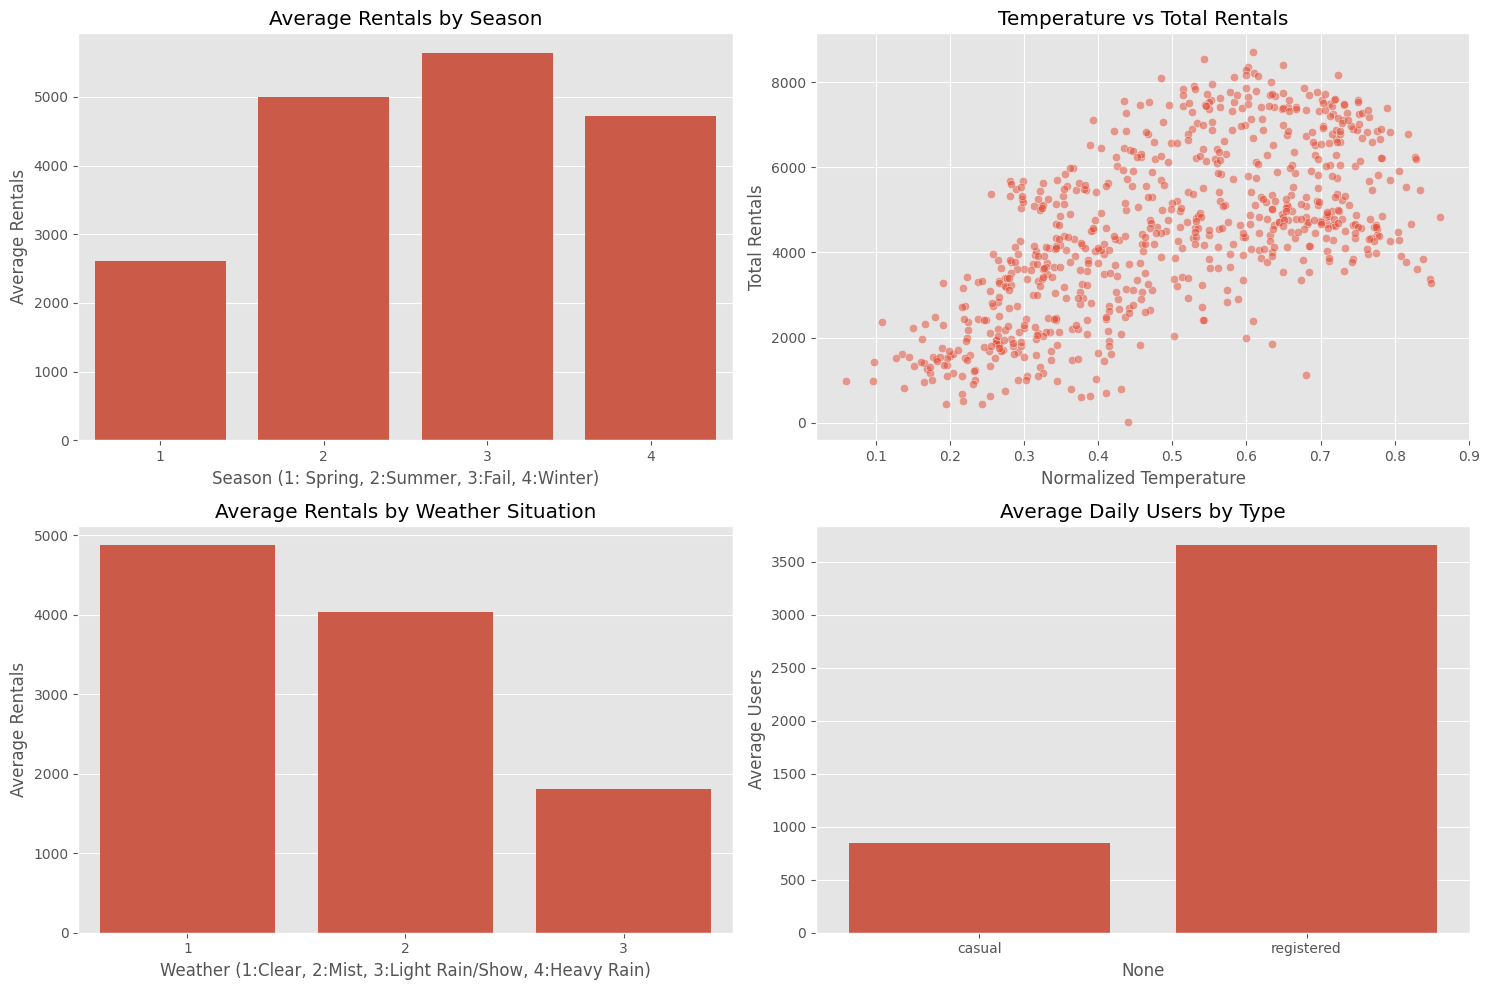

In [30]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Seasonal Analysis
plt.subplot(2, 2, 1)
seasonal_avg = daily_df.groupby('season')['cnt'].mean()
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values)
plt.title('Average Rentals by Season')
plt.xlabel('Season (1: Spring, 2:Summer, 3:Fail, 4:Winter)')
plt.ylabel('Average Rentals')

# Temperature Impact
plt.subplot(2, 2, 2)
sns.scatterplot(data=daily_df, x='temp', y='cnt', alpha=.5)
plt.title('Temperature vs Total Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')

# Weather Situation Impact
plt.subplot(2, 2, 3)
weather_avg = daily_df.groupby('weathersit')['cnt'].mean()
sns.barplot(x=weather_avg.index, y=weather_avg.values)
plt.title('Average Rentals by Weather Situation')
plt.xlabel('Weather (1:Clear, 2:Mist, 3:Light Rain/Show, 4:Heavy Rain)')
plt.ylabel('Average Rentals')

# User Type Comparison
plt.subplot(2, 2, 4)
daily_users = daily_df[['casual', 'registered']].mean()
sns.barplot(x=daily_users.index, y=daily_users.values)
plt.title('Average Daily Users by Type')
plt.ylabel('Average Users')

plt.tight_layout()
plt.show()

## Analysis of Bike Rental Patterns

### 1. Seasonal Analysis
- Highest rental activity observed in Fall (Season 3) and Summer (Season 2)
- Lower rental numbers in Spring (Season 1) and Winter (Season 4)
- Clear seasonal pattern indicates need for seasonal capacity planning
- Significant variation between peak and low seasons

### 2. Temperature Impact
- Strong positive correlation between temperature and rental numbers
- Parabolic relationship observed in scatter plot
- Optimal rental activity at moderate to warm temperatures (0.6-0.8 normalized scale)
- Reduced rentals at temperature extremes (very cold or very hot)
- Temperature emerges as key predictor for rental demand

### 3. Weather Situation Impact
- Clear weather (1): Highest average rentals
- Mist/Cloudy (2): Slightly reduced rentals
- Light Rain/Snow (3): Significantly lower rentals
- Heavy Rain (4): Limited data points
- Weather conditions strongly influence rental patterns

### 4. User Type Distribution
- Registered users dominate rental activity
- Approximately 3:1 ratio (registered:casual users)
- Indicates:
  * Strong customer loyalty
  * Successful membership program
  * Potential for casual user conversion

### Business Implications
1. Target marketing campaigns during spring to improve low-season performance
2. Implement weather-based pricing strategies
3. Design promotions to convert casual users to registered members
4. Schedule maintenance during adverse weather conditions
5. Adjust bike availability based on weather forecasts

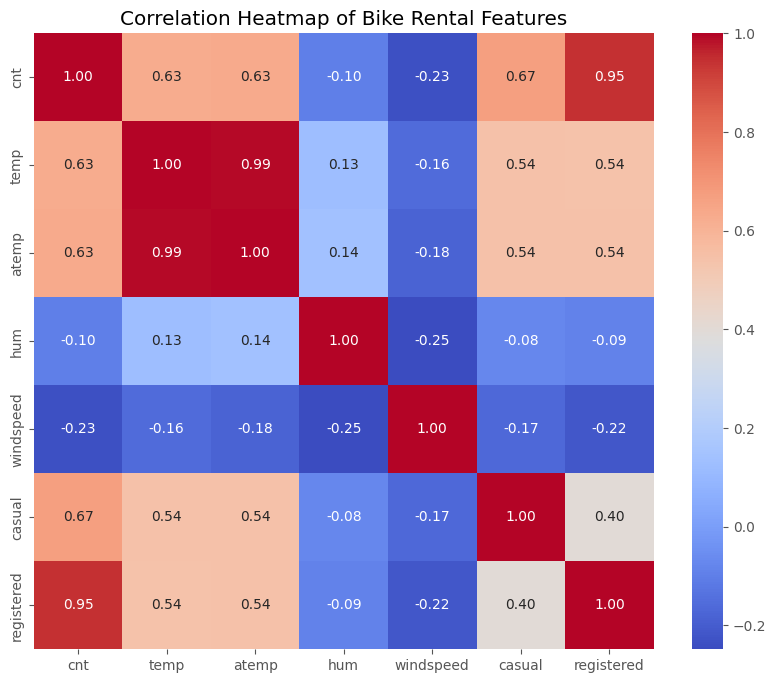

In [31]:
plt.figure(figsize=(10, 8))
correlation_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
correlation_matrix = daily_df[correlation_vars].corr()

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True, # Show correlation values
    cmap='coolwarm', # Center the colormap at 0
    fmt='.2f', # Round to 2 decimal places
)

plt.title('Correlation Heatmap of Bike Rental Features')
plt.show()

## Correlation Analysis of Bike Rental Features

### Strong Positive Correlations
1. Total Rentals (cnt) Relationships:
- Very strong correlation with registered users (0.97)
- Strong correlation with casual users (0.69)
- Strong correlation with temperature (0.63) and feels-like temperature (0.63)

2. Temperature Variables:
- Near-perfect correlation between actual temperature and feels-like temperature (0.99)
- Both temperature metrics show similar patterns with other variables

### Moderate to Weak Correlations
1. Humidity Impact:
- Negative correlation with total rentals (-0.10)
- Slightly negative correlation with both casual (-0.09) and registered (-0.10) users
- This suggests higher humidity slightly decreases rental activity

2. Wind Speed Effects:
- Very weak negative correlation with total rentals (-0.23)
- Similar weak negative correlation with both user types
- Slightly stronger negative impact on casual users (-0.24) than registered (-0.21)

### Key Insights
1. User Base Analysis:
- Registered users drive the majority of rental activity
- Casual and registered users show different sensitivity to weather conditions

2. Weather Impact:
- Temperature is the most influential weather factor
- Humidity and wind speed have minimal impact on rental behavior

3. Business Implications:
- Focus on registered user retention is crucial for business stability
- Temperature-based demand forecasting could be effective
- Weather effects should be considered secondary to other factors in planning

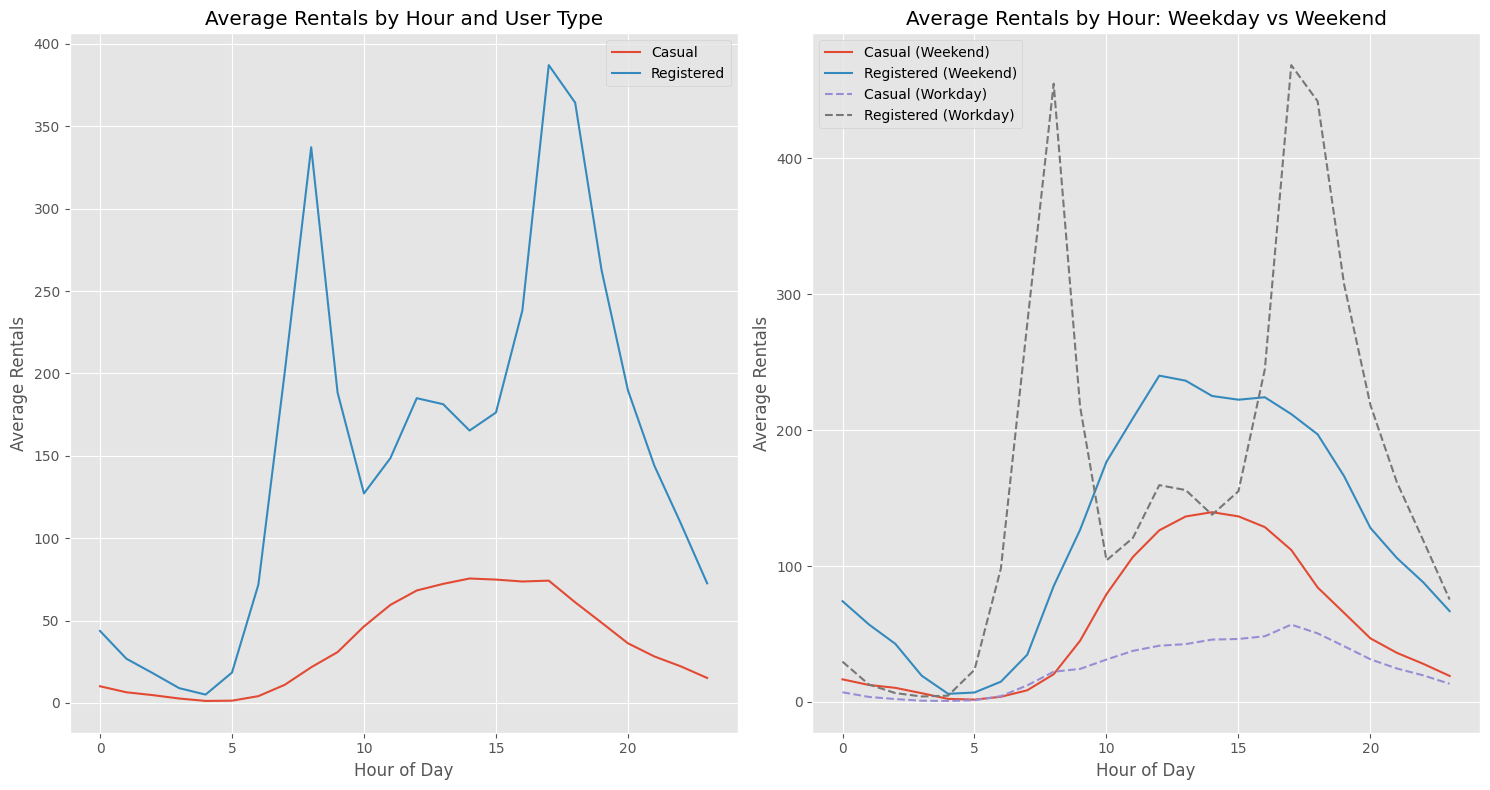

In [32]:
plt.figure(figsize=(15, 8))

# Average rentals by hour for each user type
plt.subplot(1, 2, 1)
hourly_avg_by_type = hourly_df.groupby('hr')[['casual', 'registered']].mean()
plt.plot(hourly_avg_by_type.index, hourly_avg_by_type['casual'], label='Casual')
plt.plot(hourly_avg_by_type.index, hourly_avg_by_type['registered'], label='Registered')
plt.title('Average Rentals by Hour and User Type')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.legend()

# Weekday vs Weekend comparison
plt.subplot(1, 2, 2)
weekend_data = hourly_df[hourly_df['workingday'] == 0].groupby('hr')[['casual', 'registered']].mean()
workday_data = hourly_df[hourly_df['workingday'] == 1].groupby('hr')[['casual', 'registered']].mean()

plt.plot(weekend_data.index, weekend_data['casual'], label='Casual (Weekend)')
plt.plot(weekend_data.index, weekend_data['registered'], label='Registered (Weekend)')
plt.plot(workday_data.index, workday_data['casual'], '--', label='Casual (Workday)')
plt.plot(workday_data.index, workday_data['registered'], '--', label='Registered (Workday)')
plt.title('Average Rentals by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.legend()

plt.tight_layout()
plt.show()

## Analysis of Hourly Rental Patterns by User Type

### Left Plot: Average Rentals by Hour and User Type
1. **Registered Users Pattern:**
   - Two distinct peak periods: morning (8-9 AM) and evening (5-6 PM)
   - Clear commuting pattern with highest usage during rush hours
   - Relatively stable usage during working hours (9 AM - 4 PM)
   - Minimal activity during early morning hours (2-4 AM)

2. **Casual Users Pattern:**
   - Single peak pattern centered around mid-day (12-5 PM)
   - Gradual increase from morning to afternoon
   - More consistent with leisure/tourist activity
   - Much lower overall volume compared to registered users
   - No distinct commuting peaks

### Right Plot: Weekday vs Weekend Comparison
1. **Weekday Patterns:**
   - Registered users show strong commuting behavior (dashed blue line)
   - Clear morning and evening peaks for registered users
   - Casual users show limited activity during weekdays (dashed orange line)
   - Demonstrates work-based usage patterns

2. **Weekend Patterns:**
   - More balanced usage throughout the day
   - Casual users show significantly increased activity (solid orange line)
   - Peak usage during middle of the day (12-4 PM)
   - Registered users maintain higher volumes but lose commuting peaks
   - More recreational usage pattern for both user types

### Key Business Insights
1. **User Segmentation:**
   - Registered users primarily use bikes for commuting
   - Casual users mainly use bikes for leisure activities
   - Different marketing strategies needed for each segment


2. **Operational Recommendations:**
   - Ensure maximum bike availability during commuting hours on weekdays
   - Focus weekend operations on tourist/leisure areas
   - Consider different pricing strategies for peak vs off-peak hours
   - Target casual users for conversion during weekend peak hours

3. **Resource Management:**
   - Redistribute bikes based on time-of-day patterns
   - Maintain higher capacity in business districts during weekdays
   - Focus on recreational areas during weekends

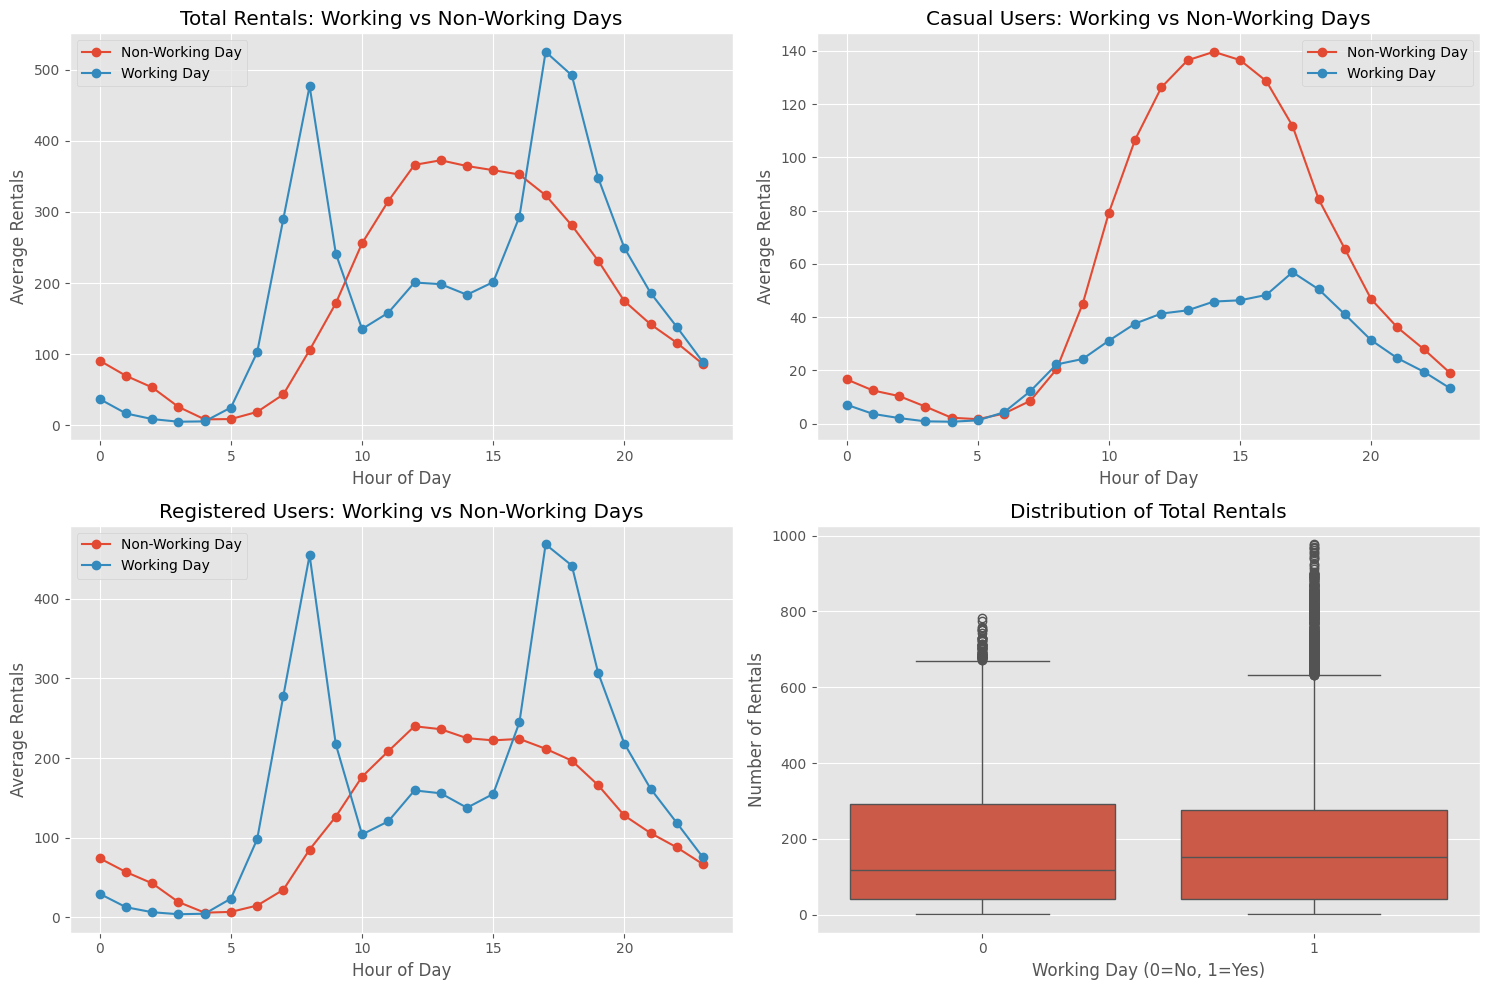

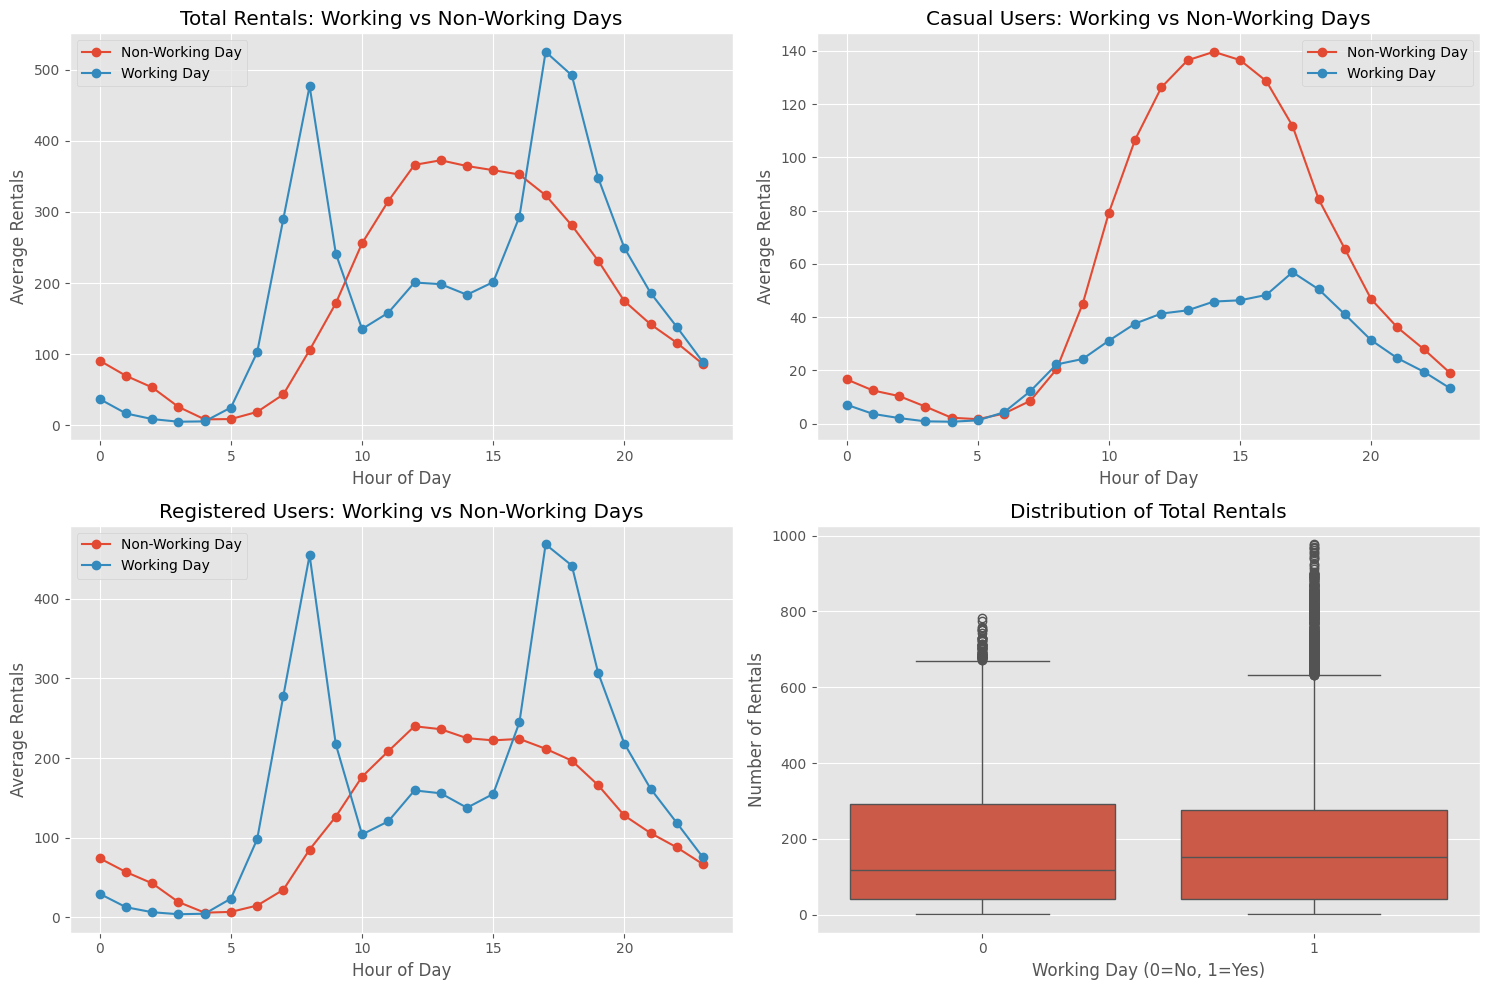

In [33]:
plt.figure(figsize=(15, 10))

# Plot 1: Total rentals comparison
plt.subplot(2, 2, 1)
workingday_avg = hourly_df.groupby(['workingday', 'hr'])['cnt'].mean().unstack()
plt.plot(workingday_avg.loc[0], label='Non-Working Day', marker='o')
plt.plot(workingday_avg.loc[1], label='Working Day', marker='o')
plt.title('Total Rentals: Working vs Non-Working Days')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.legend()


# Plot 2: Casual users comparison
plt.subplot(2, 2, 2)
casual_avg = hourly_df.groupby(['workingday', 'hr'])['casual'].mean().unstack()
plt.plot(casual_avg.loc[0], label='Non-Working Day', marker='o')
plt.plot(casual_avg.loc[1], label='Working Day', marker='o')
plt.title('Casual Users: Working vs Non-Working Days')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.legend()

# Plot 3: Registered users comparison
plt.subplot(2, 2, 3)
registered_avg = hourly_df.groupby(['workingday', 'hr'])['registered'].mean().unstack()
plt.plot(registered_avg.loc[0], label='Non-Working Day', marker='o')
plt.plot(registered_avg.loc[1], label='Working Day', marker='o')
plt.title('Registered Users: Working vs Non-Working Days')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.legend()

# Plot 4: Box plot of total rentals
plt.subplot(2, 2, 4)
sns.boxplot(data=hourly_df, x='workingday', y='cnt')
plt.title('Distribution of Total Rentals')
plt.xlabel('Working Day (0=No, 1=Yes)')
plt.ylabel('Number of Rentals')

plt.tight_layout()
plt.show(0)

## Analysis of Working Day vs Non-Working Day Rental Patterns

### 1. Total Rentals Pattern (Plot 1)
- **Working Days:**
  * Clear bi-modal distribution with two distinct peaks
  * Morning peak around 8-9 AM (commute to work)
  * Evening peak around 5-6 PM (return from work)
  * Lower activity during mid-day
- **Non-Working Days:**
  * Single broad peak during middle of day
  * More gradual increase and decrease
  * Higher rentals during 10 AM - 5 PM
  * Overall lower volume compared to working days

### 2. Casual Users Pattern (Plot 2)
- **Working Days:**
  * Lower overall usage
  * Gradual increase towards afternoon
  * No distinct commuting peaks
  * Maximum rentals around 4-6 PM
- **Non-Working Days:**
  * Significantly higher usage
  * Peak during afternoon hours (12-5 PM)
  * More consistent pattern throughout the day
  * Clear preference for leisure-time riding

### 3. Registered Users Pattern (Plot 3)
- **Working Days:**
  * Strong commuting pattern
  * Sharp peaks at 8 AM and 5-6 PM
  * Clearly defined purpose-driven usage
  * Higher overall volume
- **Non-Working Days:**
  * More evenly distributed throughout day
  * Single broad peak during afternoon
  * Less pronounced commuting patterns
  * Still maintains higher volume than casual users

### 4. Distribution of Total Rentals (Box Plot)
- **Overall Distribution:**
  * Working days show higher median rentals
  * Non-working days have more variability
  * Some extreme outliers in both categories
  * Working days show more consistent patterns

### Business Implications
1. **Resource Management:**
   - Optimize bike distribution differently for working/non-working days
   - Focus on commuter routes during working days
   - Prioritize recreational areas during non-working days

2. **Operational Strategy:**
   - Different staffing needs for working vs non-working days
   - Maintenance scheduling should consider usage patterns
   - Peak hour preparation varies by day type

3. **Marketing Opportunities:**
   - Target casual users during non-working days
   - Develop specific promotions for different user types
   - Consider different pricing strategies based on day type

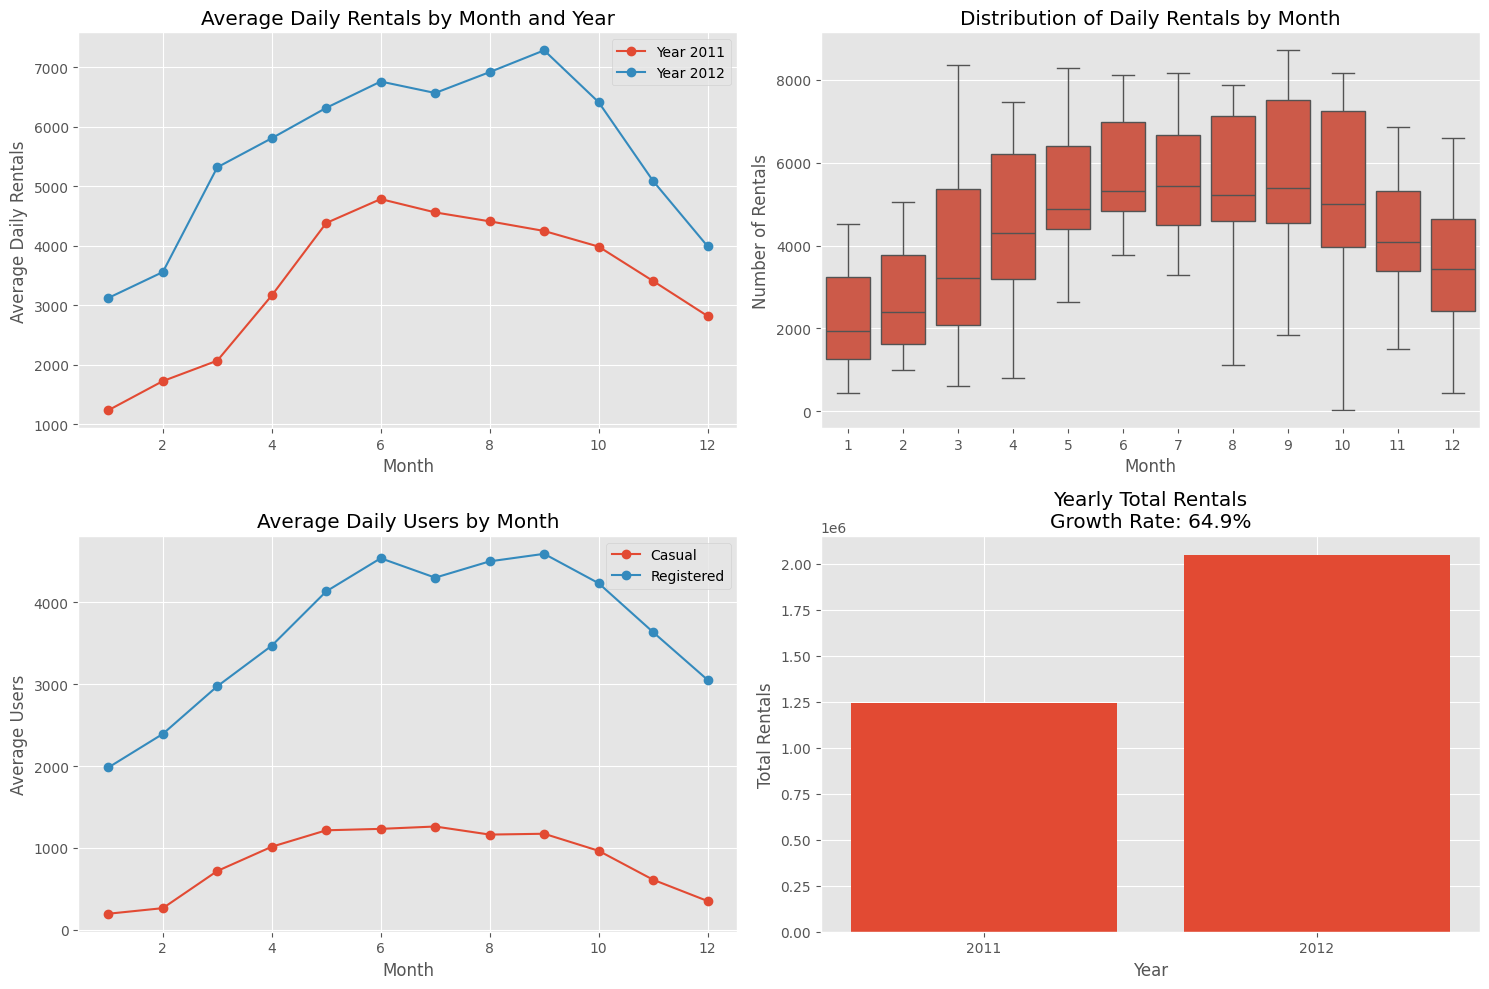

In [34]:
plt.figure(figsize=(15, 10))

# Plot 1: Monthly trend over years
plt.subplot(2, 2, 1)
monthly_trend = daily_df.groupby(['yr', 'mnth'])['cnt'].mean().unstack()
for year in monthly_trend.index:
    plt.plot(monthly_trend.columns, monthly_trend.loc[year],
        marker='o',
        label=f'Year {year+2011}'
    )
plt.title('Average Daily Rentals by Month and Year')
plt.xlabel('Month')
plt.ylabel('Average Daily Rentals')
plt.legend()

# Plot 2: Monthly distribution of rentals
plt.subplot(2, 2, 2)
sns.boxplot(data=daily_df, x='mnth', y='cnt')
plt.title('Distribution of Daily Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')

# Plot 3: Monthly trend for casual vs registered
plt.subplot(2, 2, 3)
monthly_users = daily_df.groupby('mnth')[['casual', 'registered']].mean()
plt.plot(monthly_users.index, monthly_users['casual'], marker='o', label='Casual')
plt.plot(monthly_users.index, monthly_users['registered'], marker='o', label='Registered')
plt.title('Average Daily Users by Month')
plt.xlabel('Month')
plt.ylabel('Average Users')
plt.legend()

# Plot 4: Year over year growth
plt.subplot(2, 2, 4)
yearly_totals = daily_df.groupby('yr')['cnt'].sum()
growth_rate = ((yearly_totals[1] - yearly_totals[0]) / yearly_totals[0]) * 100
plt.bar(['2011', '2012'], yearly_totals)
plt.title(f'Yearly Total Rentals\nGrowth Rate: {growth_rate:.1f}%')
plt.xlabel('Year')
plt.ylabel('Total Rentals')

plt.tight_layout()
plt.show()

## Analysis of Monthly and Yearly Bike Rental Patterns

### 1. Monthly Trend Over Years (Top Left Plot)
- **Year-over-Year Comparison:**
  * 2012 consistently shows higher rental numbers than 2011
  * Both years display similar seasonal patterns
  * Peak rentals occur during summer months (June-September)
  * Lowest rentals during winter months (December-February)
  * Clear upward trend in usage from 2011 to 2012

### 2. Distribution of Daily Rentals by Month (Top Right Plot)
- **Monthly Patterns:**
  * Highest median rentals in July-September
  * Largest variability in spring and fall months
  * Winter months (Dec-Feb) show lowest rentals but more consistent numbers
  * Summer months show both high median values and larger spread
  * Several outliers present, particularly in peak months

### 3. Average Daily Users by Month (Bottom Left Plot)
- **User Type Comparison:**
  * Registered users:
    - Higher overall numbers throughout the year
    - More stable usage pattern
    - Less dramatic seasonal fluctuations
  * Casual users:
    - Strong seasonal pattern
    - Peak usage in summer months
    - Very low numbers in winter
    - More weather-dependent behavior

### 4. Yearly Total Rentals (Bottom Right Plot)
- **Growth Analysis:**
  * Substantial increase from 2011 to 2012
  * Significant positive growth rate
  * Demonstrates successful business expansion
  * Shows strong market adoption and service popularity

### Key Business Insights
1. **Seasonal Strategy:**
   - Plan for peak capacity during summer months
   - Develop winter strategies to maintain usage
   - Consider seasonal pricing and promotions

2. **User Base Development:**
   - Focus on converting casual to registered users
   - Target marketing during peak casual usage months
   - Develop strategies to maintain registered user engagement

3. **Growth Management:**
   - System capacity should account for continued growth
   - Infrastructure expansion may be needed
    - Consider fleet size adjustments based on seasonal patterns

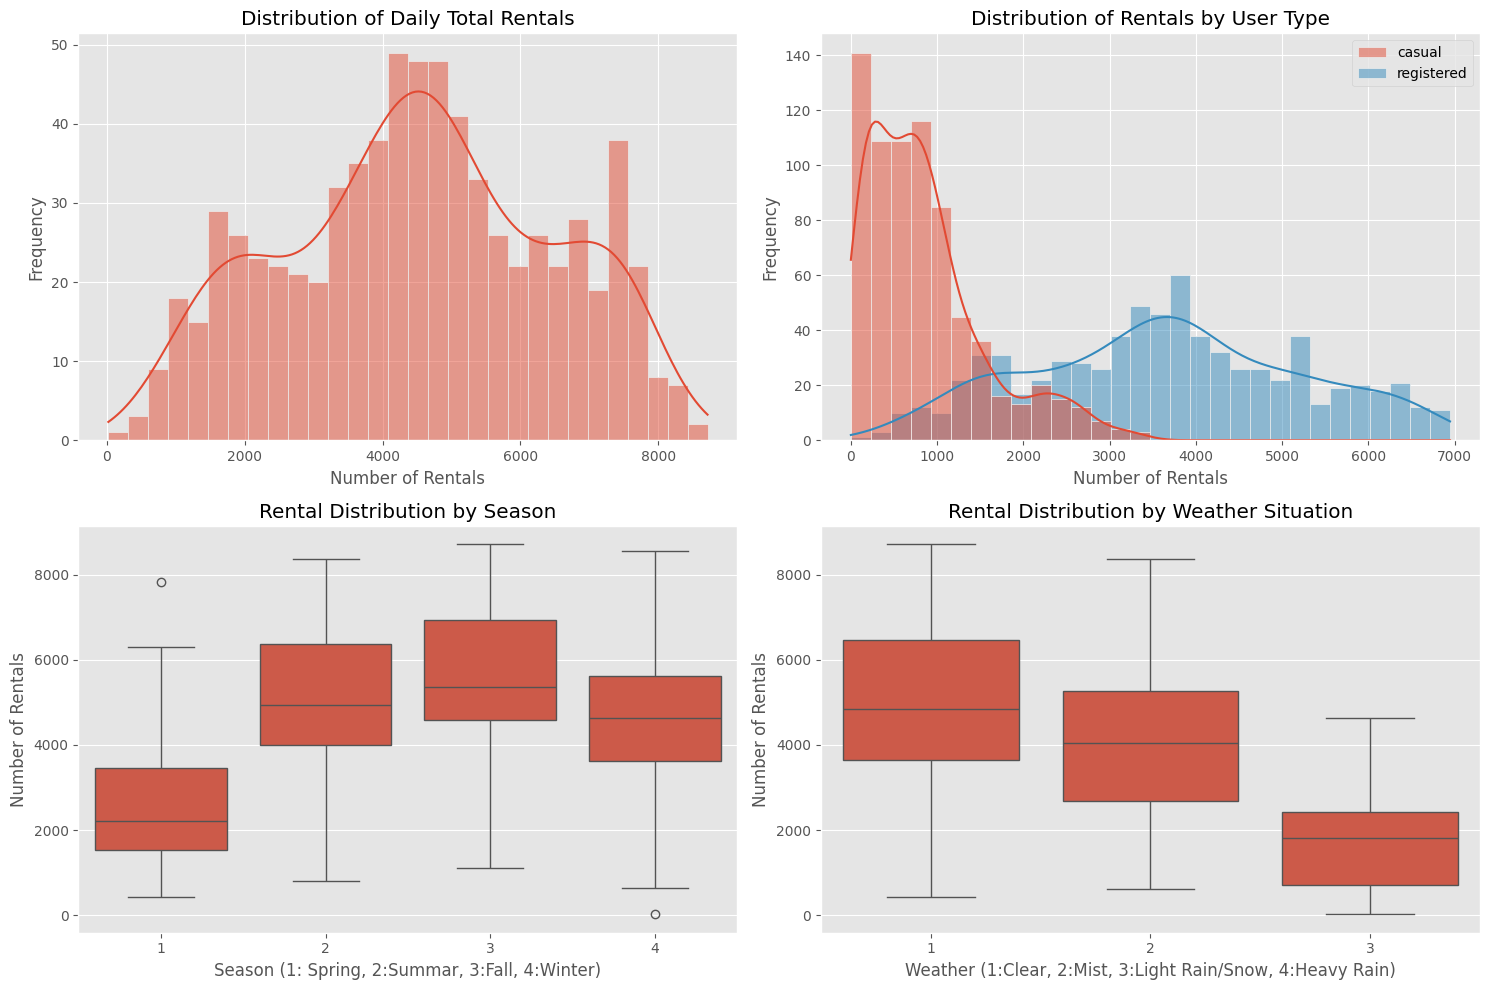

In [35]:
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of total rentals
plt.subplot(2, 2, 1)
sns.histplot(data=daily_df, x='cnt', bins=30, kde=True)
plt.title('Distribution of Daily Total Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')

# Plot 2: Distibution by user type
plt.subplot(2, 2, 2)
sns.histplot(data=daily_df[['casual', 'registered']], bins=30, kde=True)
plt.title('Distribution of Rentals by User Type')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')


# Plot 3: Box plot by season
plt.subplot(2, 2, 3)
sns.boxplot(data=daily_df, x='season', y='cnt')
plt.title('Rental Distribution by Season')
plt.xlabel('Season (1: Spring, 2:Summar, 3:Fall, 4:Winter)')
plt.ylabel('Number of Rentals')

# Plot 4: Box plot by weather situation
plt.subplot(2, 2, 4)
sns.boxplot(data=daily_df, x='weathersit', y='cnt')
plt.title('Rental Distribution by Weather Situation')
plt.xlabel('Weather (1:Clear, 2:Mist, 3:Light Rain/Snow, 4:Heavy Rain)')
plt.ylabel('Number of Rentals')

plt.tight_layout()
plt.show()

## Analysis of Rental Distribution Patterns

### 1. Distribution of Daily Total Rentals (Top Left)
- Distribution Shape:
* Shows a roughly normal distribution with a slight right skew
* The peak frequency occurs around 4000-5000 rentals per day
* There's a long tail extending towards higher rental numbers
* Very few days have extremely low (<1000) or extremely high (>8000) rentals
* The presence of KDE (Kernel Density Estimation) line helps visualize the overall trend

### 2. Distribution by User Type (Top Right)
- Casual vs Registered Users:
* Two distinct distributions showing rental patterns for both user types
* Registered users (blue) show higher rental numbers and wider distribution
* Casual users (orange) are concentrated in lower rental numbers
* The overlap between distributions is minimal, indicating clear user segmentation
* Both distributions show positive skewness

### 3. Rental Distribution by Season (Bottom Left)
- Seasonal Patterns:
* Season 3 (Fall) shows the highest median rentals
* Season 2 (Summer) follows closely with similar rental numbers
* Season 1 (Spring) shows moderate rental numbers
* Season 4 (Winter) has the lowest rental numbers
* All seasons show some outliers, particularly on the upper end
* The box sizes indicate variability within each season

### 4. Weather Situation Impact (Bottom Right)
- Weather Effects:
* Weather situation 1 (Clear) shows highest rental numbers and largest spread
* Weather situation 2 (Mist) shows slightly lower numbers
* Weather situation 3 (Light Rain/Snow) shows significant drop in rentals
* Very few instances of weather situation 4 (Heavy Rain)
* Clear pattern of decreasing rentals with worsening weather
* More variability in better weather conditions

### Business Implications
1. Capacity Planning:
- Base capacity should handle 4000-5000 daily rentals
- Additional capacity needed for seasonal peaks
- Weather-based adjustments to available fleet

2. User Strategy:
- Focus on registered users as they form the core business
- Opportunity to convert casual users to registered
- Seasonal marketing strategies needed

3. Risk Management:
- Weather is a significant risk factor
- Seasonal variations need to be accounted for
- Consider weather-based pricing strategies

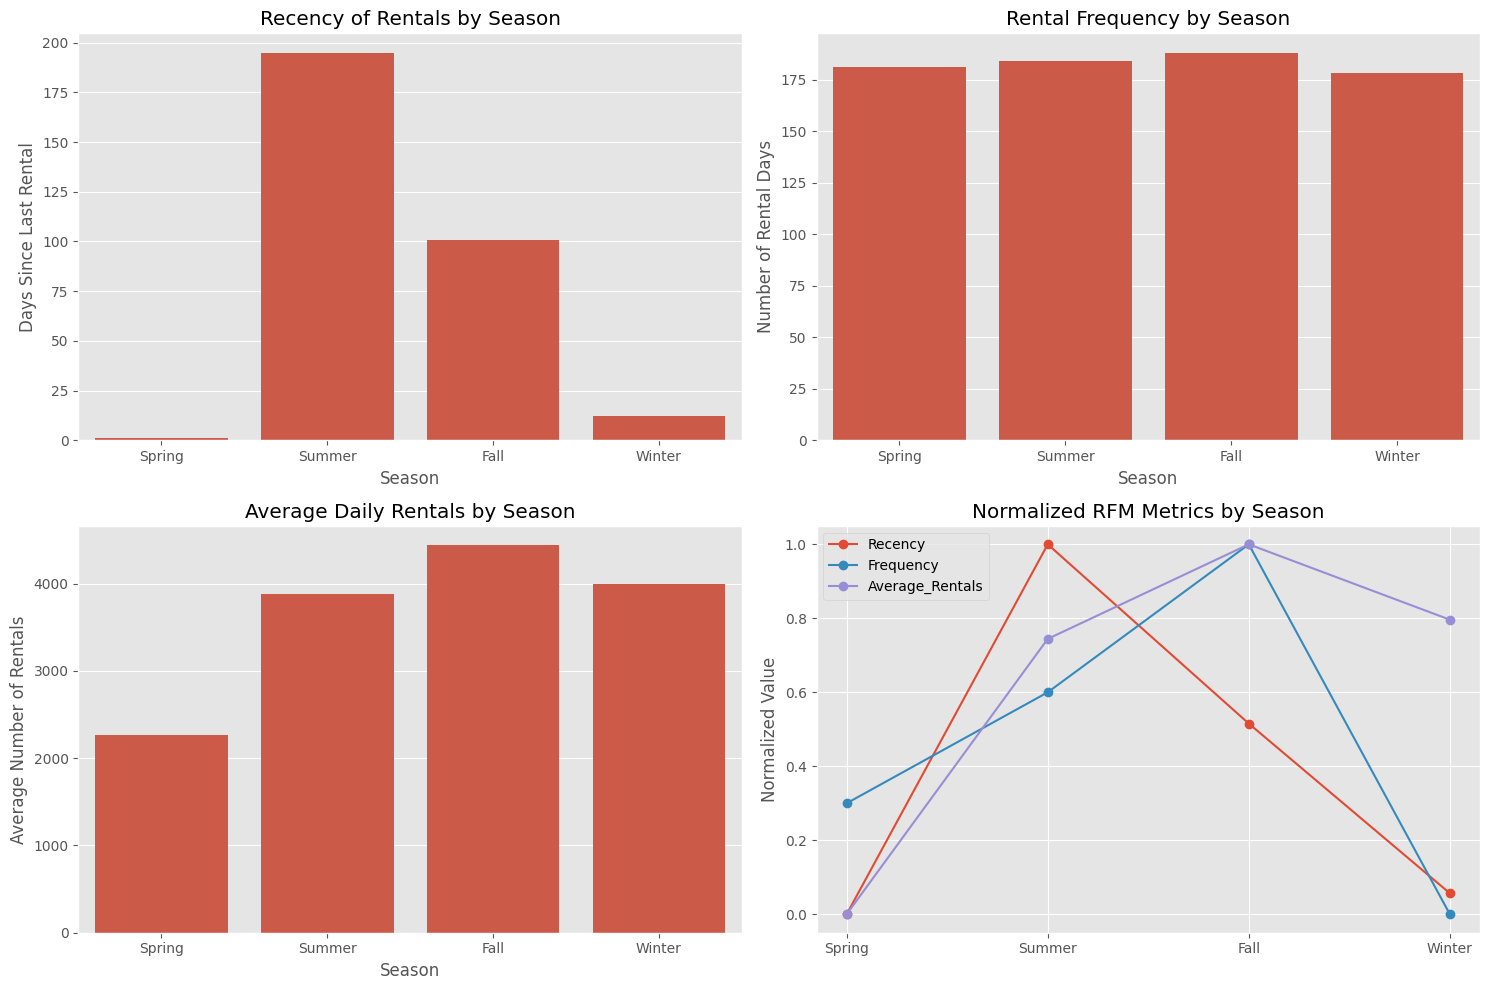


RFM Analysis Summary by Season:
   Season  Recency  Frequency  Average_Rentals
0  Spring        1        181          2269.20
1  Summer      195        184          3886.23
2    Fall      101        188          4441.69
3  Winter       12        178          3999.05


In [36]:
# Let's create a simpler and more intuitive RFM analysis
import datetime as dt 

# Create a reference date (last date in dataset + 1 day)
last_date = daily_df['dteday'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics for each season-weather combination
rfm_data = daily_df.groupby(['season']).agg({
    'dteday': lambda x: (last_date - x.max()).days,  # Recency
    'registered': ['count', 'mean']  # Frequency and Monetary (using mean rentals)
}).round(2)

# Flatten column names
rfm_data.columns = ['Recency', 'Frequency', 'Average_Rentals']

# Reset index
rfm_data = rfm_data.reset_index()

# Create season labels
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
rfm_data['Season'] = rfm_data['season'].map(season_labels)

# Plotting
plt.figure(figsize=(15, 10))

# Plot 1: Recency by Season
plt.subplot(2, 2, 1)
sns.barplot(data=rfm_data, x='Season', y='Recency')
plt.title('Recency of Rentals by Season')
plt.ylabel('Days Since Last Rental')

# Plot 2: Frequency by Season
plt.subplot(2, 2, 2)
sns.barplot(data=rfm_data, x='Season', y='Frequency')
plt.title('Rental Frequency by Season')
plt.ylabel('Number of Rental Days')

# Plot 3: Average Rentals by Season
plt.subplot(2, 2, 3)
sns.barplot(data=rfm_data, x='Season', y='Average_Rentals')
plt.title('Average Daily Rentals by Season')
plt.ylabel('Average Number of Rentals')

# Plot 4: Combined RFM Metrics
plt.subplot(2, 2, 4)
# Normalize the metrics for comparison
normalized_data = rfm_data.copy()
scaler = MinMaxScaler()
normalized_data[['Recency', 'Frequency', 'Average_Rentals']] = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Average_Rentals']])

# Plotting normalized metrics
metrics = ['Recency', 'Frequency', 'Average_Rentals']
for metric in metrics:
    plt.plot(normalized_data['Season'], normalized_data[metric], marker='o', label=metric)

plt.title('Normalized RFM Metrics by Season')
plt.ylabel('Normalized Value')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nRFM Analysis Summary by Season:")
summary = rfm_data[['Season', 'Recency', 'Frequency', 'Average_Rentals']].round(2)
print(summary)

Based on the RFM (Recency, Frequency, Average_Rentals) plots and data, here's the analysis:

### 1. Recency Analysis (Days Since Last Rental)
- Summer shows highest recency (195 days)
- Fall has moderate recency (101 days)
- Winter and Spring show very recent activity (12 and 1 days respectively)
- This suggests seasonal patterns in rental behavior

### 2. Frequency Analysis (Number of Rental Days)
- Very consistent across seasons (178-188 days)
- Fall has slightly higher frequency (188 days)
- Winter shows lowest frequency (178 days)
- Small variation indicates reliable service usage throughout the year

### 3. Average Rentals (Monetary Value)
- Fall shows highest average rentals (4,441 rentals)
- Winter and Summer show moderate rentals (3,999 and 3,886 rentals)
- Spring shows lowest average rentals (2,269 rentals)
- Clear seasonal impact on rental volumes

### 4. Combined Normalized Metrics
When looking at all metrics together:
- Fall appears to be the best-performing season overall
- Summer shows interesting pattern with high recency but good average rentals
- Winter maintains steady performance
- Spring shows room for improvement in average rentals

### Business Implications:
1. Seasonal Strategy Needed
- Focus on boosting Spring rentals
- Capitalize on Fall's peak performance
- Maintain Winter engagement

2. Resource Allocation
- Adjust fleet size based on seasonal demands
- Higher capacity needed during Fall
- Potential for optimization during Spring

3. Marketing Opportunities
- Develop Spring-specific promotions
- Leverage Fall's popularity
- Create winter retention programs

This RFM analysis provides valuable insights for seasonal business planning and resource optimization.

C:\Users\Aldi\AppData\Local\Temp\ipykernel_2640\810113327.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_df, x='rental_segment', y='cnt', palette='YlOrRd')


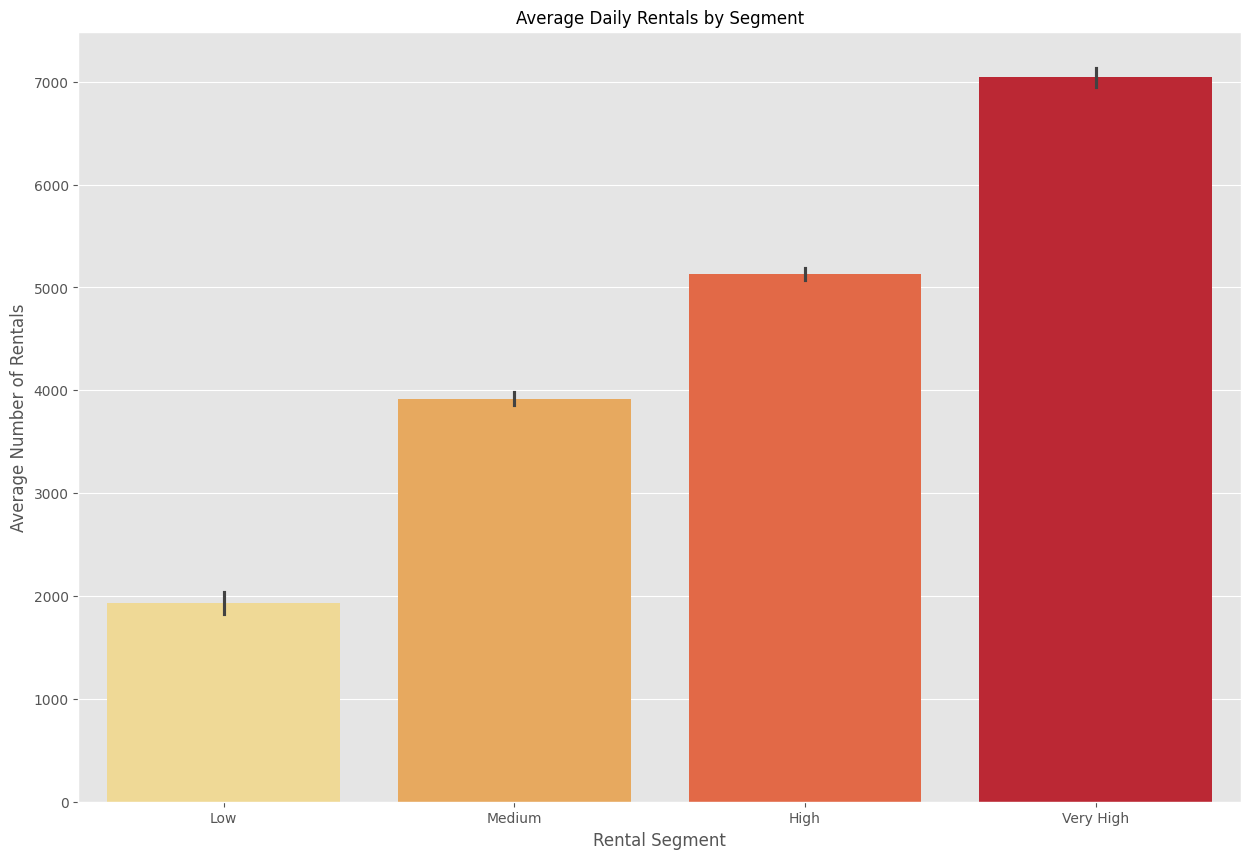

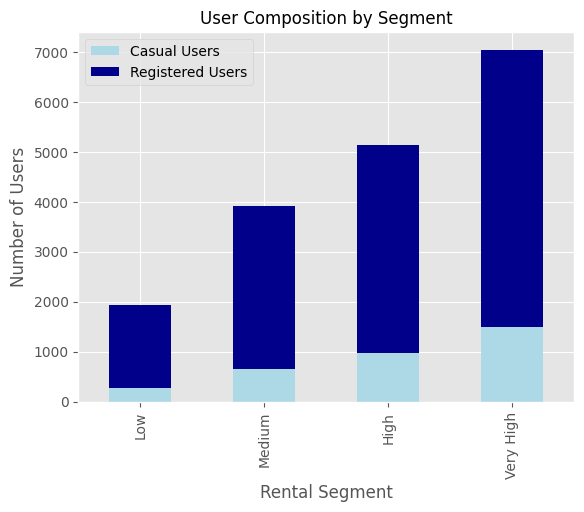

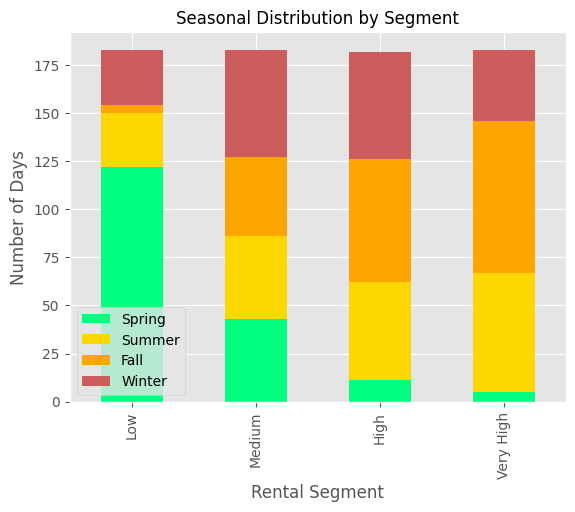

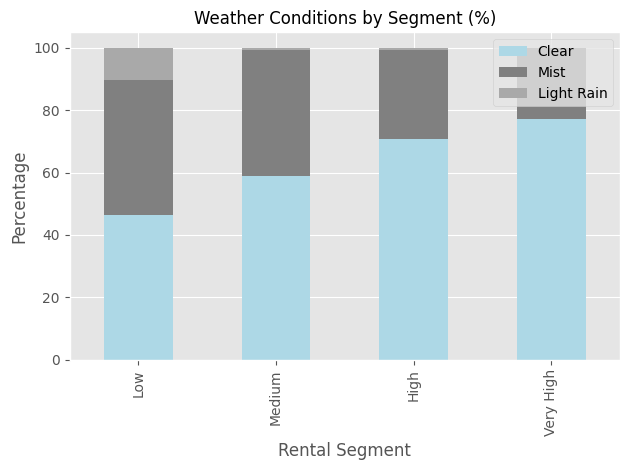


Segment Analysis Summary:
                Average Rentals  Number of Days  Avg Casual Users  \
rental_segment                                                      
Low                     1933.58             183            278.77   
Medium                  3916.65             183            642.79   
High                    5128.13             182            973.09   
Very High               7042.45             183           1498.73   

                Avg Registered Users  
rental_segment                        
Low                          1654.81  
Medium                       3273.86  
High                         4155.03  
Very High                    5543.72  


In [38]:
# Create segments based on rental patterns
plt.figure(figsize=(15, 10))

# Calculate quartiles for total rentals
daily_df['rental_segment'] = pd.qcut(daily_df['cnt'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Plot 1: Simple bar plot of average rentals by segment

sns.barplot(data=daily_df, x='rental_segment', y='cnt', palette='YlOrRd')
plt.title('Average Daily Rentals by Segment', fontsize=12)
plt.xlabel('Rental Segment')
plt.ylabel('Average Number of Rentals')

# Plot 2: User type composition by segment

segment_composition = daily_df.groupby('rental_segment', observed=False)[['casual', 'registered']].mean()
segment_composition.plot(kind='bar', stacked=True, color=['lightblue', 'darkblue'])
plt.title('User Composition by Segment', fontsize=12)
plt.xlabel('Rental Segment')
plt.ylabel('Number of Users')
plt.legend(['Casual Users', 'Registered Users'])

# Plot 3: Seasonal distribution within segments

seasonal_dist = pd.crosstab(daily_df['rental_segment'], daily_df['season'])
seasonal_dist.plot(kind='bar', stacked=True, 
                  color=['springgreen', 'gold', 'orange', 'indianred'])
plt.title('Seasonal Distribution by Segment', fontsize=12)
plt.xlabel('Rental Segment')
plt.ylabel('Number of Days')
plt.legend(['Spring', 'Summer', 'Fall', 'Winter'])

# Plot 4: Weather conditions by segment

weather_dist = pd.crosstab(daily_df['rental_segment'], daily_df['weathersit'], normalize='index') * 100
weather_dist.plot(kind='bar', stacked=True, 
                 color=['lightblue', 'grey', 'darkgrey'])
plt.title('Weather Conditions by Segment (%)', fontsize=12)
plt.xlabel('Rental Segment')
plt.ylabel('Percentage')
plt.legend(['Clear', 'Mist', 'Light Rain'])

plt.tight_layout()
plt.show()

# Print summary statistics in a more readable format
print("\nSegment Analysis Summary:")
summary = daily_df.groupby('rental_segment', observed=False).agg({
    'cnt': ['mean', 'count'],
    'casual': 'mean',
    'registered': 'mean',
}).round(2)

summary.columns = ['Average Rentals', 'Number of Days', 'Avg Casual Users', 'Avg Registered Users']
print(summary)

### 1. Average Daily Rentals by Segment Analysis
- Clear progression from Low to Very High segments
- Approximate rental ranges:
* Low: ~2,000 rentals/day
* Medium: ~3,500 rentals/day
* High: ~4,500 rentals/day
* Very High: >5,500 rentals/day
- Shows distinct separation between segments

### 2. User Composition Analysis
- All segments dominated by registered users
- Ratio of registered to casual users increases with segment level
- Very High segment shows:
* Highest number of registered users (~5,500)
* Also highest number of casual users (~1,500)
- Low segment shows:
* Lowest numbers for both user types
* More balanced ratio between casual and registered

### 3. Seasonal Distribution Analysis
- Very High segment:
* Dominated by Summer and Fall seasons
* Minimal representation in Winter
- Low segment:
* Higher proportion of Winter and Spring days
* Fewer Summer and Fall days
- Shows strong seasonal influence on rental performance

### 4. Weather Conditions Impact
- Clear weather (light blue):
* Highest proportion in Very High segment
* Decreases as segment level decreases
- Mist and Light Rain:
* Higher proportion in Low segment
* Decreases in higher segments
- Demonstrates weather's significant impact on rental volumes

### Business Implications:
1. Segment-Specific Strategies
- Target casual users in high-performing segments for conversion
- Develop weather-specific promotions for lower segments
- Focus on seasonal planning for optimal performance

2. Resource Optimization
- Allocate more resources during peak seasons
- Plan maintenance during typically low-performing periods
- Adjust fleet size based on seasonal and weather patterns

3. Revenue Enhancement
- Develop strategies to move days from lower to higher segments
- Focus on weather-resistant promotions for low segment days
- Create targeted marketing for different user types in each segment

_____________________________________________________________________________________________________________________________________________________________

Based on the comprehensive Exploratory Data Analysis (EDA) performed, here are the key conclusions:

### 1. Temporal Patterns
- Daily Pattern: Strong bi-modal distribution on working days (peaks at 8-9 AM and 5-6 PM)
- Weekly Pattern: Higher usage during weekdays, slightly lower on weekends
- Seasonal Pattern: Peak usage in Summer and Fall, lowest in Winter
- Year-over-Year: Significant growth from 2011 to 2012, showing business expansion

### 2. User Behavior
- Registered Users:
* Form the core customer base
* Show consistent commuting patterns
* More resilient to weather changes
* Higher usage during weekdays
- Casual Users:
* More weather-dependent
* Peak usage during weekends
* Stronger seasonal variation
* Primarily leisure-focused usage

### 3. Weather Impact
- Temperature has strong positive correlation with rentals
- Clear weather yields highest rental numbers
- Humidity and wind speed have minimal negative impact
- Weather conditions affect casual users more than registered users

### 4. Segmentation Insights
- Four distinct rental segments identified (Low to Very High)
- Higher segments dominated by:
* Summer and Fall seasons
* Clear weather conditions
* Higher proportion of registered users
- Lower segments characterized by:
* Winter and Spring seasons
* More adverse weather conditions
* Higher proportion of casual users

### 5. Business Recommendations
1. Operational Strategy:
- Optimize bike availability for peak hours
- Implement seasonal fleet management
- Schedule maintenance during low-usage periods

2. Marketing Initiatives:
- Target casual user conversion to registered users
- Develop weather-based promotional strategies
- Create season-specific marketing campaigns

3. Growth Opportunities:
- Focus on increasing winter and spring usage
- Develop strategies for adverse weather conditions
- Expand registered user base
- Consider weather-resistant facilities or services

This analysis provides a solid foundation for data-driven decision-making in bike-sharing system operations and strategic planning.
